<a href="https://colab.research.google.com/github/pcpiscator/2T2021/blob/main/C%C3%B3pia_de_Furg_ECD_Machine_Learning_II_Semana_02_Redu%C3%A7%C3%A3o_de_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Especialização em Ciência de Dados - FURG
## Machine Learning I - Redução de dimensionalidade
### Prof. Marcelo Malheiros

Parte do código adaptada de Aurélien Geron (licença Apache-2.0)

---

# Inicialização

Aqui importamos as bibliotecas fundamentais de Python para este _notebook_:

- NumPy: suporte a vetores, matrizes e operações de Álgebra Linear
- Matplotlib: biblioteca de visualização de dados
- Pandas: pacote estatístico e de manipulação de DataFrames
- Scikit-Learn: biblioteca com algoritmos de Machine Learning

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Maldição da dimensionalidade

Aqui vamos fazer um experimento para medir quanto mais de "espaço" adicionamos a um conjunto de dados quando aumentamos suas dimensões.

Por simplicidade, vamos sortear um certo número de $m$ pontos aleatórios com coordenadas no intervalo $[0, 1)$ para cada uma das $n$ dimensões. Então, vamos medir a distância média entre todos os pares desses pontos.

Isso equivale a criar um _dataset_ com $m$ instâncias (linhas) e $n$ atributos (colunas), ou seja, uma matriz de tamanho $m \times n$.

In [9]:
# função auxiliar
def distância_média(pontos):
    m = pontos.shape[0]
    n = pontos.shape[1]
    
    medidas = 0
    soma = 0.0
    for i in range(0, m):
        for j in range(0, m):
            if i != j:
                # a norma de ordem 2 corresponde à distância euclidiana
                soma += np.linalg.norm(pontos[i] - pontos[j], ord=2)
                medidas += 1
    print(f'A distância média entre {m} pontos de dimensão {n} é {soma / medidas:.3f}')

In [11]:
# 1 dimensão
pontos = np.random.uniform(size=(100, 1))
distância_média(pontos)

A distância média entre 100 pontos de dimensão 1 é 0.342


A distância média entre 100 pontos de dimensão 1 é 0.344


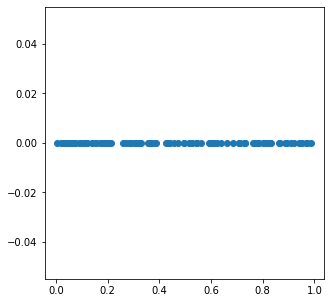

In [6]:
np.random.seed(42)

# uma dimensão
pontos = np.random.uniform(size=(100, 1))
distância_média(pontos)

fig = plt.figure(figsize=(5, 5))
plt.plot(pontos, np.zeros_like(pontos), 'o')
plt.show()

In [12]:
# duas dimensões
pontos = np.random.uniform(size=(100, 2))
distância_média(pontos)

A distância média entre 100 pontos de dimensão 2 é 0.519


A de baixo não bateu com a de cima.

A distância média entre 100 pontos de dimensão 2 é 0.530


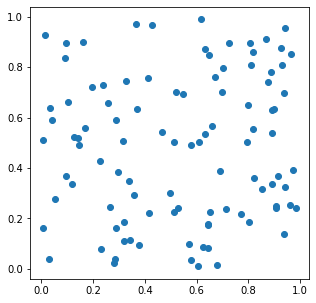

In [ ]:
# duas dimensões
pontos = np.random.uniform(size=(100, 2))
distância_média(pontos)

fig = plt.figure(figsize=(5, 5))
plt.plot(pontos[:,0], pontos[:,1], 'o')
plt.show()

In [13]:
# Três dimensões
pontos = np.random.uniform(size=(100, 3))
distância_média(pontos)

A distância média entre 100 pontos de dimensão 3 é 0.660


A distância média entre 100 pontos de dimensão 3 é 0.670


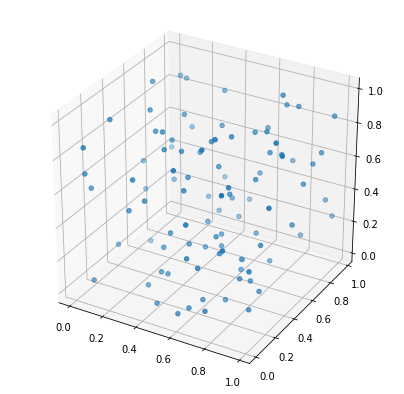

In [7]:
# três dimensões
pontos = np.random.uniform(size=(100, 3))
distância_média(pontos)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
#ax.plot(pontos[:,0], pontos[:,1], pontos[:,2], 'o')
ax.scatter(pontos[:,0], pontos[:,1], pontos[:,2])
plt.show()

In [14]:
# dez dimensões
pontos = np.random.uniform(size=(100, 10))
distância_média(pontos)

A distância média entre 100 pontos de dimensão 10 é 1.278


In [15]:
# cem dimensões
pontos = np.random.uniform(size=(100, 100))
distância_média(pontos)

A distância média entre 100 pontos de dimensão 100 é 4.053


# Abordagem usando projeção

Vamos exemplificar em seguida o uso de dois algoritmos que usam a abordagem de projeção: PCA e Kernel PCA.

Primeiro, para demonstrar o PCA, vamos gerar um conjunto de dados sintéticos de **três dimensões**, armazenado na matriz `X`.

O **Kernel PCA (KPCA)** é uma versão não-linear da **Análise de Componentes Principais(PCA)**. Este método é calculado implicitamente através de uma função Kernel para um espaço de maior dimensionalidade. O KPCA é capaz de extrair características não lineares a partir de um conjunto de dados (Schölkopf, Knirsch, et al., 1998).

In [23]:
np.random.seed(42)

m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

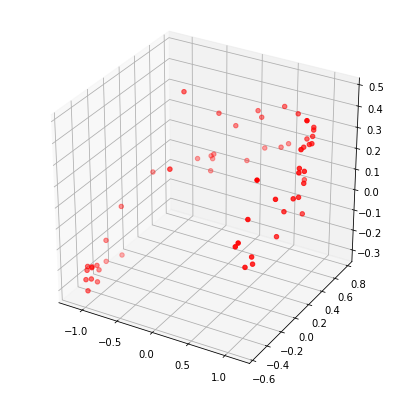

In [24]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c='red')
plt.show()

# Teste meu ↓

In [25]:
np.random.seed(42)

m = 600
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

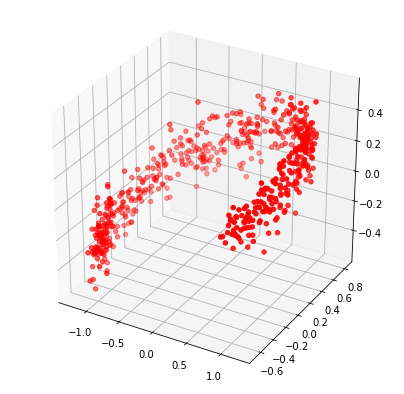

In [26]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c='red')
plt.show()

## Algoritmo PCA

A biblioteca Scikit-Learn tem uma implementação completamente automatizada do PCA, que também é muito simples de usar.

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [30]:
X2D[:5]

array([[-0.84215535, -0.2715551 ],
       [ 1.31716118,  0.42271063],
       [ 0.90857445, -0.21985797],
       [ 0.24320893, -0.54094716],
       [-0.97452908,  0.29833733]])

O objeto `PCA` dá acesso aos componentes principais (ou eixos) que foram computados para os dados:

In [31]:
pca.components_

array([[-0.94779602, -0.26438788, -0.17827435],
       [ 0.30567362, -0.91250961, -0.27182687]])

Uma informação muito útil é a **proporção da variância explicada** de cada componente principal, disponível por meio da variável `explain_variance_ratio_`. Esta indica a proporção da variância do conjunto de dados ao longo de cada eixo associado a um componente principal.

In [32]:
pca.explained_variance_ratio_

array([0.85341357, 0.13787559])

Então 85,4% da variância do conjunto de dados está ao longo do primeiro eixo e 13,6% ao longo do segundo eixo. 

Isso deixa menos de 1% para o terceiro eixo, por isso é razoável supor que provavelmente carregue pouca informação. Então esta redução de dimensionalidade foi bem sucedida.

In [33]:
1 - pca.explained_variance_ratio_.sum()

0.008710841501857414

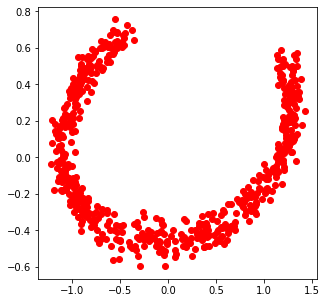

In [34]:
# plotagem dos dados reduzidos para duas dimensões
fig = plt.figure(figsize=(5, 5))
plt.plot(X2D[:,0], X2D[:,1], 'or')
plt.show()

Agora vamos experimentar reduzir para um único componente, ou seja, restará uma única dimensão.

In [35]:
pca = PCA(n_components=1)
X1D = pca.fit_transform(X)
X1D[:5]

array([[-0.84215535],
       [ 1.31716118],
       [ 0.90857445],
       [ 0.24320893],
       [-0.97452908]])

Como os dados são os mesmos, o primeiro (e único) componente também é o mesmo de antes:

In [36]:
pca.components_

array([[-0.94779602, -0.26438788, -0.17827435]])

In [37]:
pca.explained_variance_ratio_

array([0.85341357])

Então 85,4% da variância do conjunto de dados foi mantida pelo primeiro eixo, e o restante, cerca de 14,5%, foi perdida:

In [38]:
1 - pca.explained_variance_ratio_.sum()

0.14658643040303387

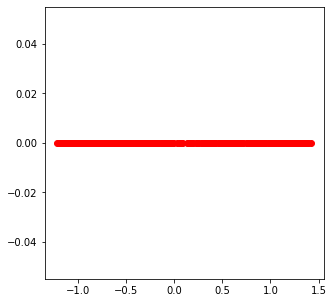

In [39]:
fig = plt.figure(figsize=(5, 5))
plt.plot(X1D, np.zeros_like(X1D), 'or')
plt.show()

## Conjunto de dados MNIST

Vamos aqui carregar a versão já disponível no Colaboratory do _dataset_ MNIST, que corresponde a imagens de dígitos manuscritos, já separados em conjuntos de treino e de teste.

Este é um _dataset_ de alta dimensionalidade, uma vez que cada instância contém 28 * 28 = 784 atributos, além do rótulo indicando qual dígito de 0 a 9 este representa.

In [46]:
# cada linha representa um dígito: o rótulo está na coluna 0
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
mnist_train.shape

(20000, 785)

Modifiquei de 3 para 15 ↓

In [47]:
mnist_train.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# cada linha representa um dígito: o rótulo está na coluna 0
mnist_test = pd.read_csv('sample_data/mnist_test.csv', header=None)
mnist_test.shape

(10000, 785)

In [49]:
mnist_test.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
X_treino = mnist_train.iloc[:,1:].values
y_treino = mnist_train.iloc[:,0].values
X_teste = mnist_test.iloc[:,1:].values
y_teste = mnist_test.iloc[:,0].values

## Escolhendo o número certo de dimensões

Em vez de escolher arbitrariamente o número de dimensões para reduzir, é geralmente preferível escolher o número de dimensões que somam uma porção suficientemente grande da variação (por exemplo, 95%).

Caso o objetivo seja visualizar os dados, então devemos reduzir a dimensionalidade para 2 ou 3 dimensões.

O código a seguir calcula o PCA sem reduzir a dimensionalidade e, em seguida, calcula o número mínimo de dimensões necessárias para preservar 95% da variância do conjunto de treinamento:

In [52]:
pca = PCA()
pca.fit(X_treino)
soma_cumulativa = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(soma_cumulativa >= 0.95) + 1
print('número de dimensões:', d)

número de dimensões: 153


É útil plotar a variância explicada como uma função do número de dimensões, criando um gráfico da soma cumulativa.

Na curva normalmente haverá um trecho, usualmente chamada de "cotovelo" (ou _elbow_, em inglês) onde a variância explicada pára de crescer rapidamente. Esta inflexão pode ser interpretada como a dimensionalidade intrínseca deste conjunto de dados.

Aqui, em particular, podemos ver que ao reduzirmos a dimensionalidade do PCA para cerca de 100 dimensões também não perderíamos muita da variância explicada.

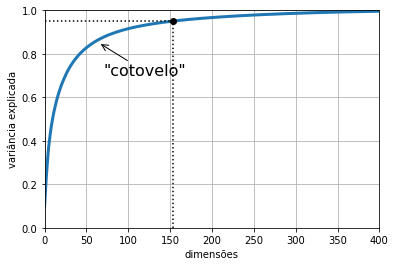

In [53]:
# plotagem da soma cumulativa das variâncias
plt.figure(figsize=(6,4))
plt.plot(soma_cumulativa, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel('dimensões')
plt.ylabel('variância explicada')
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot(d, 0.95, 'ko')
plt.annotate('"cotovelo"', xy=(65, 0.85), xytext=(70, 0.7), arrowprops=dict(arrowstyle='->'), fontsize=16)
plt.grid(True)
plt.show()

Uma vez definido o número de dimensões `d`, podemos fazer `n_components=d` e executar o PCA novamente.

Porém, há uma opção muito melhor: em vez de especificar o número de componentes principais que desejamos preservar, podemos definir `n_components` como um valor real entre 0 e 1, indicando a proporção da variação que queremos manter.

Então o número de componentes mantido é exatamente aquele que garante o percentual indicado.

In [54]:
pca = PCA(n_components=0.95)
X_reduzido = pca.fit_transform(X_treino)

In [55]:
# número de componentes selecionados
pca.n_components_

153

In [56]:
# variação explicada total destes componentes
np.sum(pca.explained_variance_ratio_)

0.9500236906587659

## Visualizando a perda de dados ao usar o PCA

Após a redução da dimensionalidade, o conjunto de treinamento passa a ocupar muito menos espaço.

No exemplo anterior o conjunto de dados MNIST teve a redução de 784 _features_ para apenas 153, ainda que preservando 95% de sua variação. Ou seja, o _dataset_ foi reduzido para cerca de 20% do seu tamanho original.

Este é exatamente o princípio por trás da **compressão de dados com perda**: trocamos uma perda controlada da informação (que muitas vezes é redundante) por um conjunto mais compacto dos dados.

Então vamos agora **descomprimir** o conjunto de dados reduzido de volta para 784 dimensões, aplicando a **transformação inversa** da projeção PCA. Isso é feito com a função `.inverse_transform()` sobre o conjunto de dados reduzido.

Naturalmente não teremos de volta exatamente os dados originais, uma vez que a projeção perdeu um pouco de informação (dentro da variação de 5% que foi descartada), mas provavelmente uma boa aproximação deles.

In [57]:
X_recuperado = pca.inverse_transform(X_reduzido)

Vamos agora exibir um comparativo entre alguns dígitos do conjunto de treinamento original (à esquerda) e os dígitos correspondentes após a compressão e descompressão. Há uma ligeira perda de qualidade na imagem, mas os dígitos ainda estão intactos.

In [58]:
# função auxiliar
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'binary', **options)
    plt.axis('off')

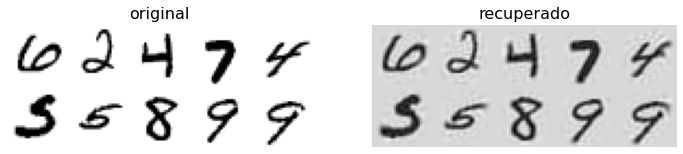

In [59]:
# comparativo
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_digits(X_treino[::2100])
plt.title('original', fontsize=16)
plt.subplot(122)
plot_digits(X_recuperado[::2100])
plt.title('recuperado', fontsize=16)
plt.show()

A distância quadrada média entre os dados originais e os dados recuperados (comprimidos e depois descomprimidos) é chamada de **erro de reconstrução**.

Isoladamente esta medida não faz muito sentido, pois depende da escala e da quantidade de atributos. Mas é uma métrica interessante para comparar diferentes aplicações do PCA.

In [60]:
loss = np.sum((X_treino - X_recuperado) ** 2, axis=1).mean()
print('erro de reconstrução:', loss)

erro de reconstrução: 171532.7995553503


## Conjunto de dados "Swiss roll"

Aqui vamos criar um conjunto mais complexo de dados, em que a abordagem linear no algoritmo PCA não é bem sucedida. Então precisamos de outros algoritmos para conseguir ter sucesso na redução da dimensionalidade deste _dataset_.

In [61]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

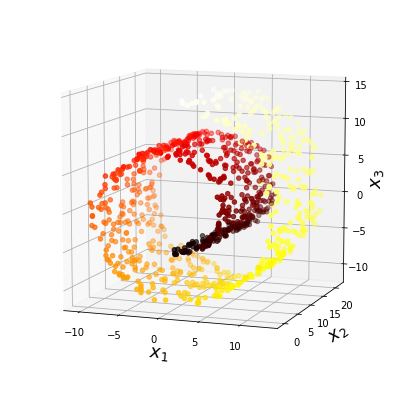

In [64]:
# plotagem do dataset
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap='hot')
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

## Algoritmo Kernel PCA

O uso do algoritmo Kernel PCA é mais complexo, pois é preciso escolher um **kernel** e também **hiperparâmetros** para este ajuste.

Além disso, não é mais possível usarmos a variância explicada como medida de controle para a projeção.

Então não existe uma medida de desempenho óbvia para auxiliar na seleção dos melhores valores de _kernel_ e dos hiperparâmetros. No entanto, como a redução da dimensionalidade é muitas vezes uma etapa de preparação para uma tarefa de aprendizagem supervisionada (classificação ou regressão), é comum simplesmente usar a pesquisa em _grid_ testar uma certa quantidade de combinações de kernels e hiperparâmetros, mantendo os que levam ao melhor desempenho nessa tarefa.

In [65]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, fit_inverse_transform=True)
X_reduzido = rbf_pca.fit_transform(X)

Como a transformação usando Kernel PCA é não-linear, a transformação inversa não é imediata.

Então, se esta tansformação for necessária, a opção `fit_inverse_transform=True` precisa ser passada na criação do objeto. Assim, podemos usar a mesma função `.inverse_transform()` para reconstruir os dados a partir do conjunto reduzido.

In [66]:
X_recuperado = rbf_pca.inverse_transform(X_reduzido)

Para ilustrar, o código abaixo exibe o resultado da aplicação de três diferentes _kernels_ ao mesmo conjunto de dados `swissroll`, em que a redução é feita de três para duas dimensões.

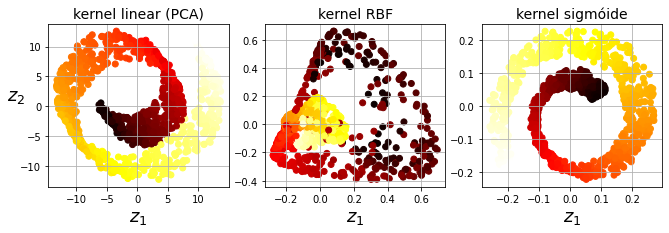

In [68]:
lin_pca = KernelPCA(n_components=2, kernel='linear')
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
sig_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1)

plt.figure(figsize=(11, 3))
for subplot, pca, title in ((131, lin_pca, 'kernel linear (PCA)'), \
                            (132, rbf_pca, 'kernel RBF'), 
                            (133, sig_pca, 'kernel sigmóide')):
    X_reduzido = pca.fit_transform(X)    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduzido[:, 0], X_reduzido[:, 1], c=t, cmap='hot')
    plt.xlabel('$z_1$', fontsize=18)
    if subplot == 131:
        plt.ylabel('$z_2$', fontsize=18, rotation=0)
    plt.grid(True)

plt.show()


# Abordagem usando aprendizado de variedades

O algoritmo mais comum que usa aprendizado de variedades é o Incorporação Linear Local, ou em inglês, Locally Linear Embedding (LLE).


## Algoritmo LLE

Vamos demonstrar o algoritmo LLE sobre o mesmo conjunto de dados anterior, o `swissroll`.

In [69]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduzido = lle.fit_transform(X)

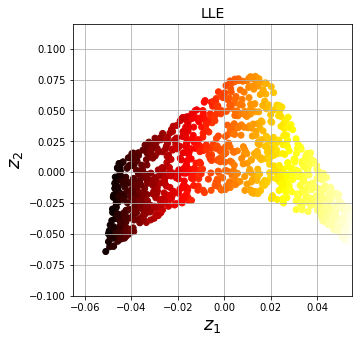

In [70]:
plt.figure(figsize=(5, 5))
plt.title('LLE', fontsize=14)
plt.scatter(X_reduzido[:, 0], X_reduzido[:, 1], c=t, cmap='hot')
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

# Outros algoritmos

Aqui vamos apenas ilustrar brevemente outras técnicas de redução de dimensionalidade.

O algoritmo **Multidimensional Scaling (MDS)** reduz a dimensionalidade enquanto tenta preservar as distâncias entre as instâncias.

O algoritmo **Isomap** cria um gráfico conectando cada instância a seus vizinhos mais próximos e, em seguida, reduz a dimensionalidade enquanto tenta preservar as distâncias geodésicas entre as instâncias.

O algoritmo **t-Distributed Stochastic Neighbor Embedding (t-SNE)** reduz a dimensionalidade ao tentar manter instâncias semelhantes próximas, ao mesmo tempo em que instâncias diferentes são separadas. É usado principalmente para visualização, em particular para exibir _clusters_ de instâncias em espaço de alta dimensão.

In [71]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduzido_mds = mds.fit_transform(X)

In [72]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduzido_isomap = isomap.fit_transform(X)

In [73]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduzido_tsne = tsne.fit_transform(X)

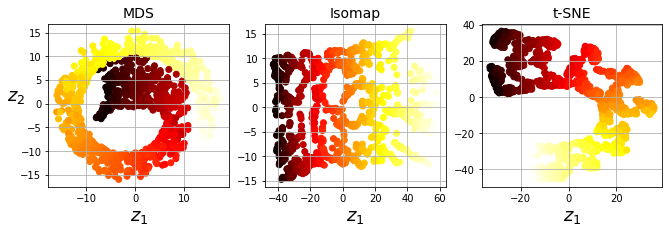

In [74]:
titles = ['MDS', 'Isomap', 't-SNE']
datasets = (X_reduzido_mds, X_reduzido_isomap, X_reduzido_tsne)

plt.figure(figsize=(11, 3))
for subplot, title, X_reduzido in zip((131, 132, 133), titles, datasets):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduzido[:, 0], X_reduzido[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel('$z_1$', fontsize=18)
    if subplot == 131:
        plt.ylabel('$z_2$', fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

Finalmente, a **Análise Discriminante Linear** ou **Linear Discriminant Analysis (LDA)** é na verdade um algoritmo de classificação. Porém, durante o treinamento este algoritmo aprende os eixos mais discriminativos entre as classes. Então tais eixos podem então ser usados para definir um hiperplano no qual projetar os dados. O benefício é que a projeção manterá as classes o mais distantes possível. Assim a LDA é uma boa técnica para reduzir a dimensionalidade antes de executar outro algoritmo de classificação.

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_treino, y_treino) # observe aqui o uso necessário dos rótulos
X_reduzido_lda = lda.transform(X_treino)

# Redução de tempo de treinamento

Aqui vamos treinar um **classificador Random Forest** sobre o conjunto MNIST, cronometrando quanto tempo leva e avaliando o modelo resultante usando o conjunto de teste.

In [76]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42, n_estimators=100)

%time rnd_clf.fit(X_treino, y_treino)

CPU times: user 13.7 s, sys: 32 µs, total: 13.7 s
Wall time: 13.7 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
from sklearn.metrics import accuracy_score

y_prev = rnd_clf.predict(X_teste)
accuracy_score(y_teste, y_prev)

0.9592

Agora vamos usar o PCA para reduzir a dimensionalidade do conjunto de dados, usando uma proporção da variância explicada de 95%.

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_treino_reduzido = pca.fit_transform(X_treino)

Em seguida, vamos treinar um **novo classificador Random Forest** com o conjunto de dados reduzido e examinar quanto tempo leva.

In [79]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf2 = RandomForestClassifier(random_state=42, n_estimators=100)

%time rnd_clf2.fit(X_treino_reduzido, y_treino)

CPU times: user 31.4 s, sys: 1.2 ms, total: 31.4 s
Wall time: 31.3 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

O treino ficou **mais lento**. De fato, a redução da dimensionalidade nem sempre leva a um tempo de treinamento mais rápido: depende do conjunto de dados, do modelo e do algoritmo de treinamento.

Agora vamos verificar a precisão do novo classificador.

In [80]:
# note que o conjunto de teste também precisa ser reduzido
X_teste_reduzido = pca.transform(X_teste)

y_prev = rnd_clf2.predict(X_teste_reduzido)
accuracy_score(y_teste, y_prev)

0.9329

É comum que o desempenho caia ligeiramente ao reduzir a dimensionalidade, porque perdemos algum sinal útil no processo. No entanto, a queda de desempenho é bastante severa neste caso. Portanto, o PCA realmente não ajudou: desacelerou o treinamento e reduziu o desempenho.

Vamos agora testar os dados originais e reduzidos em um **classificador SGD**.

In [81]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, loss='hinge')

%time sgd_clf.fit(X_treino, y_treino)

CPU times: user 39.9 s, sys: 5.4 ms, total: 39.9 s
Wall time: 39.7 s


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
y_prev = sgd_clf.predict(X_teste)
accuracy_score(y_teste, y_prev)

0.8736

In [83]:
from sklearn.linear_model import SGDClassifier

sgd_clf2 = SGDClassifier(random_state=42, loss='hinge')

%time sgd_clf2.fit(X_treino_reduzido, y_treino)

CPU times: user 13.2 s, sys: 6.44 ms, total: 13.2 s
Wall time: 13.2 s


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
y_prev = sgd_clf2.predict(X_teste_reduzido)
accuracy_score(y_teste, y_prev)

0.8532

Para o classificados SGD tivemos uma ligeira queda no desempenho, que pode ser um preço razoável a pagar por um aumento significativo de velocidade de treinamento, dependendo da aplicação.

# Uso de redução de dimensionalidade para visualização de dados

Agora vamos usar diversos algoritmos para reduzir a dimensionalidade do conjunto MNIST para duas dimensões, de forma que possamos examinar visualmente o conjunto de dados.

Para reduzir o tempo de processamento, vamos usar apenas 5,000 das 20,000 instâncias do _dataset_:

In [85]:
X = X_treino[:5000]
y = y_treino[:5000]

A ideia é usar a função `scatter()` da biblioteca Matplotlib para traçar um gráfico de dispersão, associando uma cor diferente para cada dígito. Para isso usamos uma função auxiliar, definida abaixo.

In [86]:
def simple_plot(X, y):
    plt.figure(figsize=(12, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')
    plt.axis('off')
    plt.colorbar()
    plt.show()

CPU times: user 611 ms, sys: 440 ms, total: 1.05 s
Wall time: 554 ms


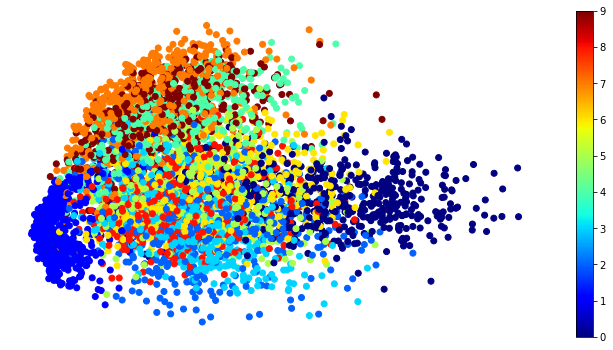

In [ ]:
from sklearn.decomposition import PCA

%time X_pca_reduzido = PCA(n_components=2, random_state=42).fit_transform(X)
simple_plot(X_pca_reduzido, y)

CPU times: user 50 s, sys: 2.32 s, total: 52.3 s
Wall time: 49.7 s


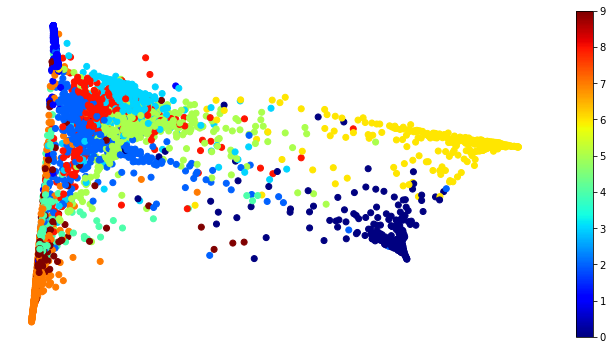

In [87]:
# ATENÇÃO: esse modelo demora um pouco, cerca de 1 minuto no Colaboratory

from sklearn.manifold import LocallyLinearEmbedding

%time X_lle_reduzido = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
simple_plot(X_lle_reduzido, y)

CPU times: user 2.6 s, sys: 236 ms, total: 2.84 s
Wall time: 1.71 s


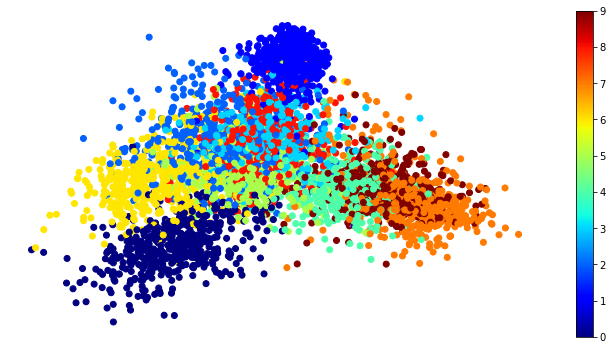

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%time X_lda_reduzido = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
simple_plot(X_lda_reduzido, y)

CPU times: user 2min, sys: 223 ms, total: 2min 1s
Wall time: 1min 24s


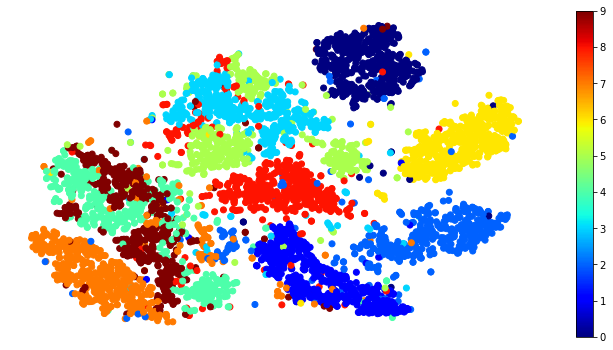

In [89]:
# ATENÇÃO: esse modelo demora um pouco, cerca de 2 minutos no Colaboratory

from sklearn.manifold import TSNE

%time X_tsne_reduzido = TSNE(n_components=2, random_state=42).fit_transform(X)
simple_plot(X_tsne_reduzido, y)

Pela proximidade entre os _clusters_ de cores, o último gráfico informa quais números são facilmente distinguíveis dos outros (por exemplo, 0, 6 e a maioria dos dígitos 8 são agrupamentos bem separados). Também diz quais números são muitas vezes difíceis de distinguir, como 4 e 9, ou os dígitos 5 e 3.

## Visualizações mais elaboradas

A função `plot_digits()` abaixo desenha um gráfico de dispersão e adiciona dígitos coloridos, com uma distância mínima garantida entre os mesmos. Se as imagens dos dígitos forem fornecidas, elas serão plotadas.

Esta implementação foi inspirada em um dos excelentes exemplos do Scikit-Learn [plot_lle_digits](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html).

In [90]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)
                
    plt.show()

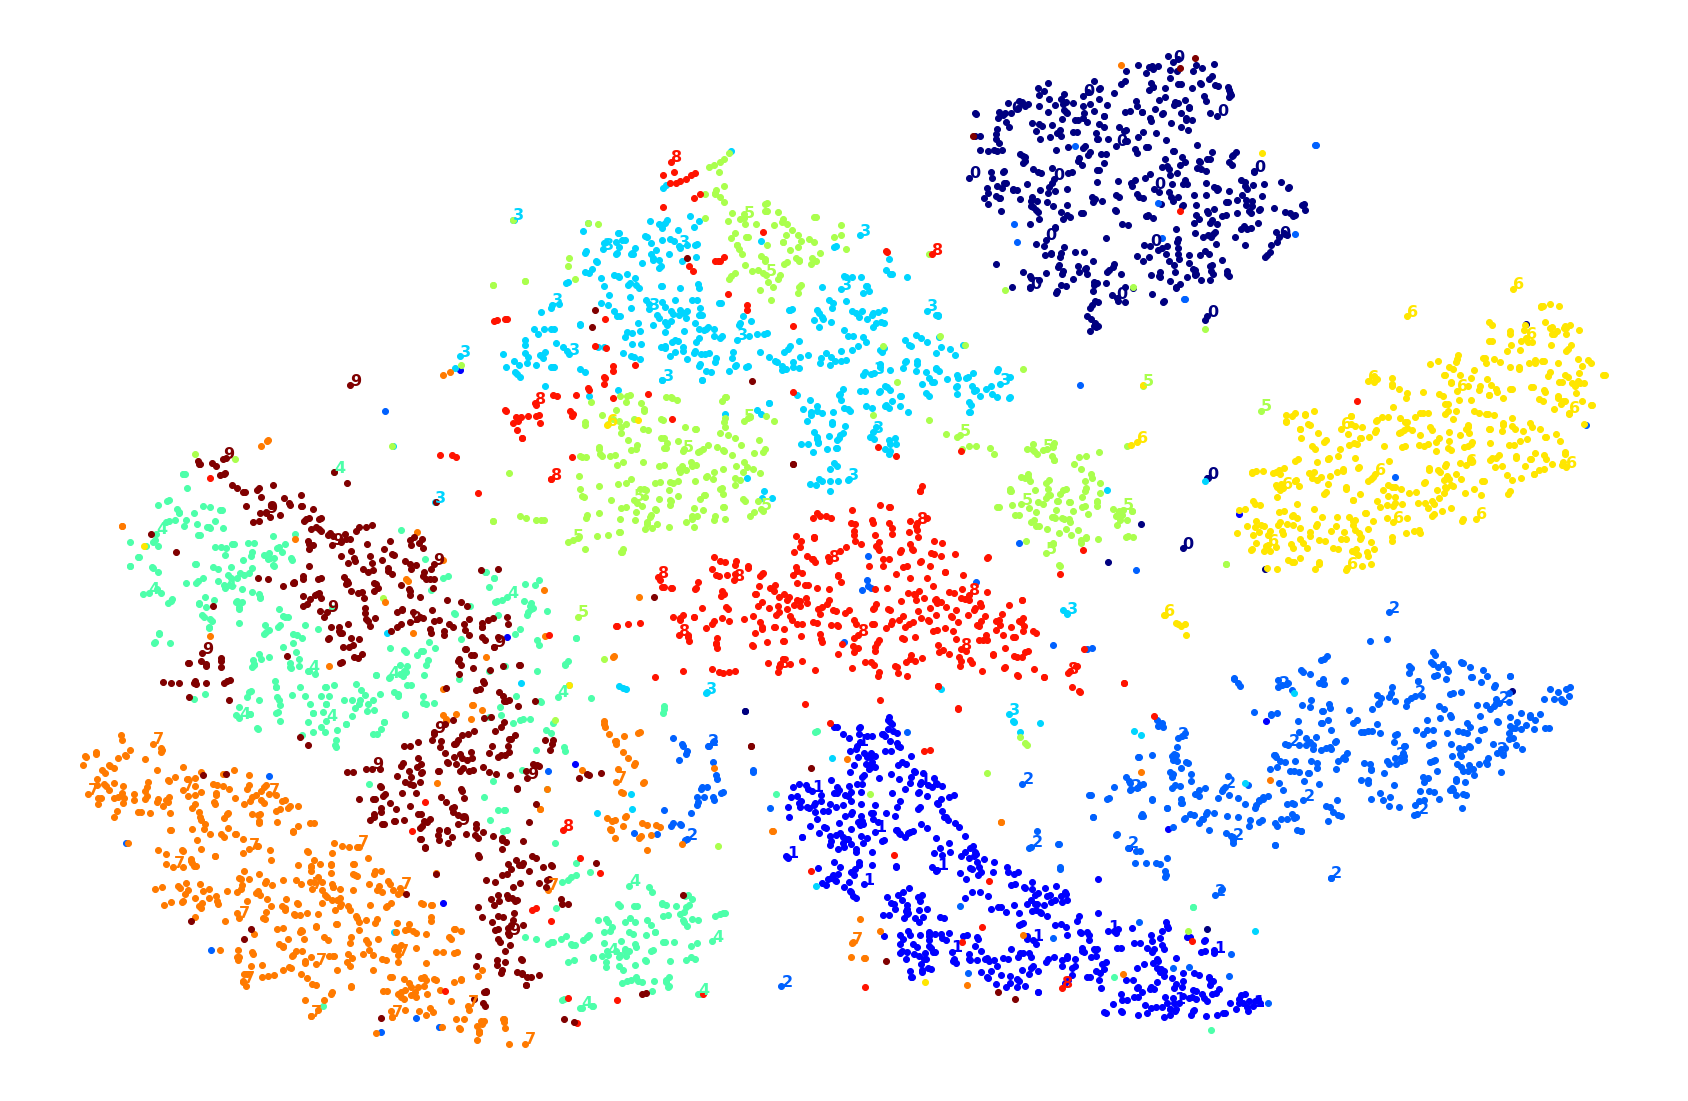

In [91]:
# versão com dígitos coloridos
plot_digits(X_tsne_reduzido, y, figsize=(30, 20))

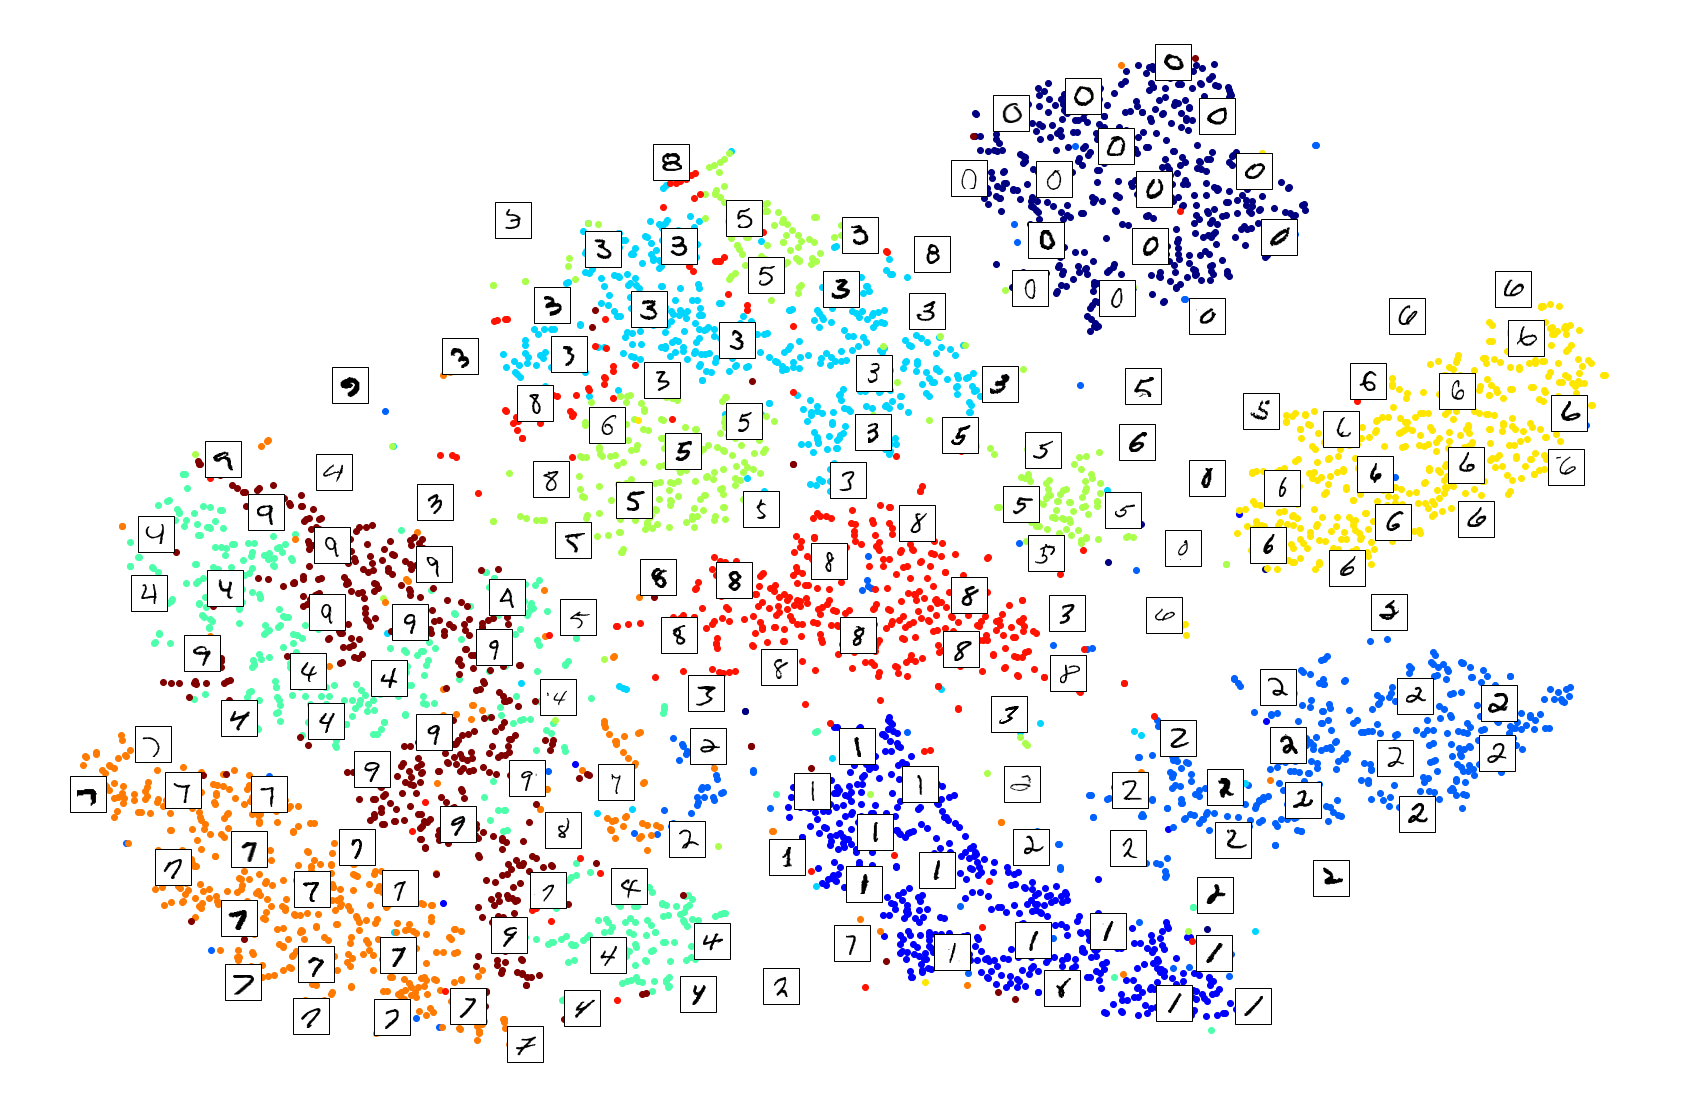

In [92]:
# versão com imagens dos dígitos
plot_digits(X_tsne_reduzido, y, figsize=(30, 20), images=X)